# Python Practice: Optimization Basic

Jun Song

Korea University

## Optimization

**Goal** Find $x \in \mathbb{R}^p$ such that minimizes $ l(x), $
where $l: \mathbb{R}^p \rightarrow \mathbb{R}$. This $l(\cdot)$ is called an **objective function** or **loss function**.

**Example** Let $(x_1,y_1), \ldots, (x_n, y_n) \in \mathbb{R}^p \times \mathbb{R}$ be a dataset $\cal D$. i.e,. $x_i=(x_{i1},\ldots, x_{ip})^T\in \mathbb{R}^p$. We are seeking $\beta = (\beta_0,\beta_1,\ldots, \beta_p)^T \in \mathbb{R}^{p+1}$ which minimizes the loss
$$ l(\beta;{\cal D}) = \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\ldots+\beta_px_{ip}))^2. $$

For simplicity, define
$$ \mathbf{y} = \begin{pmatrix}
y_1\\
\vdots\\
y_n
\end{pmatrix}
, \quad
\mathbf{X}=\begin{pmatrix}
 x_{11} & \cdots & x_{1p} \\
 \vdots & \vdots & \vdots \\
 x_{n1} & \cdots & x_{np}
\end{pmatrix}
,\quad
\mathbb{X}=\begin{pmatrix}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{n1} & \cdots & x_{np}
\end{pmatrix}
,\quad
\beta= \begin{pmatrix}
\beta_0\\
\vdots\\
\beta_p
\end{pmatrix}
$$

$$l(\beta; \mathbb{X},\mathbf{y}) =(\mathbf{y}-\mathbb{X}\beta)^T(\mathbf{y}-\mathbb{X}\beta)$$


# Gradient Descent Algorithm
$$
x^{(t+1)} = x^{(t)} - \alpha \frac{dl}{dx} ( x^{(t)}),
$$
for some learning rate (or step size) $\alpha>0$. 

In [4]:
%pip install --upgrade pip

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas numpy matplotlib scikit-learn ISLP

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 32.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.4 MB/s eta 0:00:00
Using cached cy

In [1]:
import numpy as np
from typing import Callable

def gd_optim(start: np.ndarray, 
             gradient: Callable, 
             lr: float, 
             max_iter: int, 
             tol: float=0.01):
    """
    Gradient Descent optimization
    Input:
        start: np.array(d,) or double
            initial value for the input in the loss function (x or beta in the above representation)
            d: dimension of input in the loss function 
        gradient: gradient function (pre-defined)
        lr: scalar value
            learinng rate (step size for GD)
        max_iter: integer
            max number of iterations
        tol: scalar
            tolerance to conditionally stop the algorithm (in this case a default value is 0.01)
    Output:
        steps: list, trajectory of optimization
        x: final output
    """
    steps = [start] # history tracking
    x = start

    for _ in range(max_iter):
        diff = lr*gradient(x)
        if np.abs(diff)<tol:
          break    
        x = x - diff
        steps.append(x) # history tracing

    return steps, x

## Example 1: a quadratic function

Let’s take a simple quadratic function defined as:
$$
f(x) = x^2-4x+1
$$

Because it is an univariate function a gradient function is:
$$
\frac{df(x)}{dx}=2x-4
$$

In [2]:
def func1(x):
    return x**2-4*x+1

def gradient_func1(x):
    return 2*x - 4

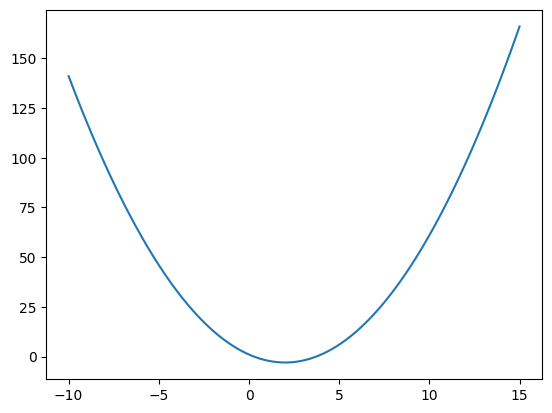

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 15, 100)
y = func1(x)
plt.plot(x, y)
plt.show()

For this function, by taking a learning rate of 0.1 and starting point at x=9,

In [4]:
history, result = gd_optim(9, gradient_func1, 0.1, 100)

Make an animation to see the performance

In [5]:
from matplotlib.animation import ArtistAnimation

def gd_anim(history, lossftn, gradient,xlim=(-10,15),figsize = (6, 4), name = 'anim.gif', fps = 3):
    images = []
    px_list = []
    py_list = []
    fig, ax = plt.subplots(figsize = figsize)
    x = np.linspace(xlim[0], xlim[1], 100)
    n_iter = len(history) # number of iterations
    
    # Function plot
    f = plt.plot(x, lossftn(x), color = 'k')
    
    for frame in range(n_iter):
        px = float(history[frame])
        # Plot point to track
        py = lossftn(px) # Y coordinate of point    
        point = plt.scatter(px, py, color = 'r', zorder = 2.5)
        
        # Draw a line        
        px_list.append(px)
        py_list.append(py)
        trajectory = plt.plot(px_list,py_list, 'ro-')
            
            

        # Plot tangent line to the graph at (px, py) point
        slope = gradient(px)
        y_intercept = py - slope * px
        tx = np.arange(px - 1, px + 2, 2) # X coordinates of tangent line
        ty = slope * tx + y_intercept # Y coordinates of tangent line
        tangent = plt.plot(tx, ty, 'r--')    


        # Plot text info
        bbox_args = dict(boxstyle="round", fc="0.8")
        arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
        text = f'Iteration: {frame}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {frame:.4f}'
        text = ax.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 12)

        plt.title('Gradient descent animation')    
        

        images.append([f[0], tangent[0], trajectory[0], point, text])
        
        old_px = px
        old_py = py
    
    anim = ArtistAnimation(fig, images) 
    anim.save(name, writer = 'imagemagic', fps = fps)
    

MovieWriter imagemagic unavailable; using Pillow instead.


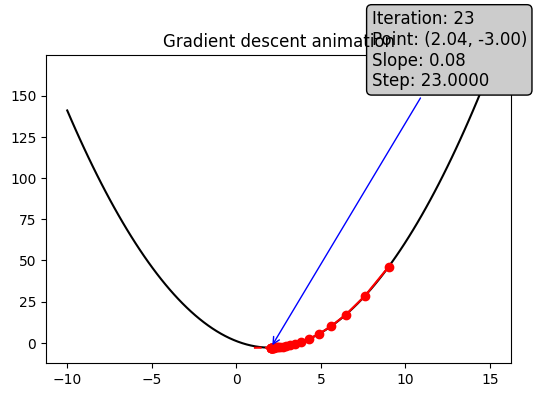

In [6]:
gd_anim(history, func1, gradient_func1, name = 'gd1_lr0_1.gif')

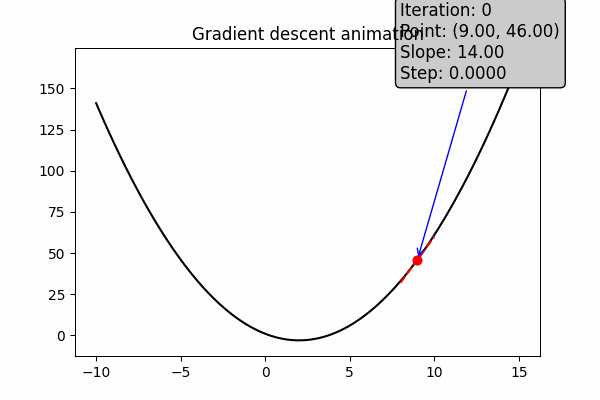

Let's try different learning rate

MovieWriter imagemagic unavailable; using Pillow instead.


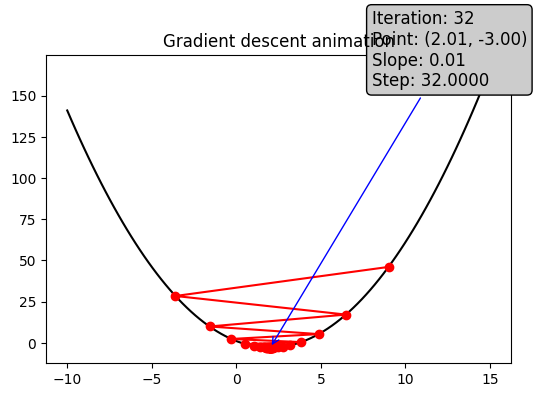

In [12]:
history, result = gd_optim(9, gradient_func1, 0.9, 100)
gd_anim(history, func1, gradient_func1, name = 'gd1_lr0_9.gif')

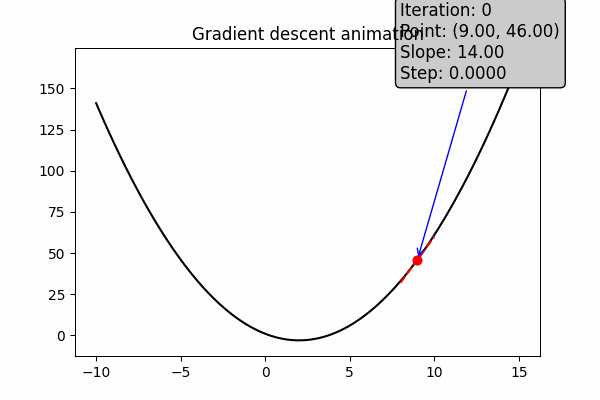

## Example 2: a function with a saddle point

Now let’s see how the algorithm will cope with a semi-convex function we investigated mathematically before.
$$
f(x) = x^4-2x^3+2
$$

Because it is an univariate function a gradient function is:
$$
\frac{df(x)}{dx}=4x^3-6x^2
$$

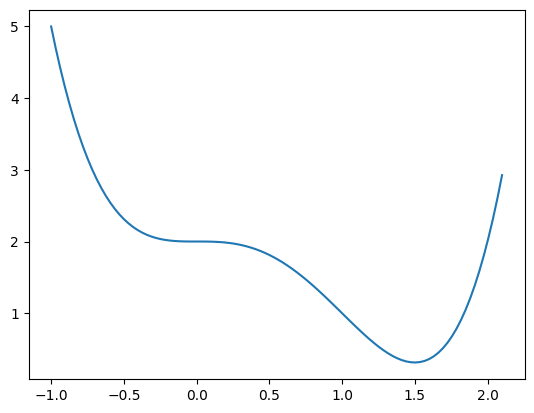

In [13]:
def func2(x):
    return x**4-2*x**3+2

def gradient_func2(x):
    return 4*x**3 - 6*x**2

x = np.linspace(-1, 2.1, 100)
y = func2(x)
plt.plot(x, y)
plt.show()

MovieWriter imagemagic unavailable; using Pillow instead.


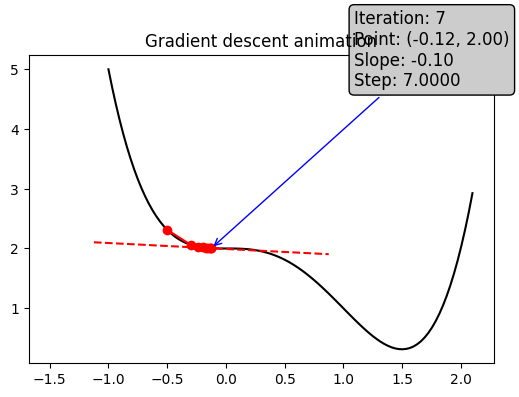

In [14]:
history, result = gd_optim(-0.5, gradient_func2, 0.1, 100)
gd_anim(history, func2, gradient_func2, (-1,2.1), name = 'gd2_init_05_lr0_1.gif')

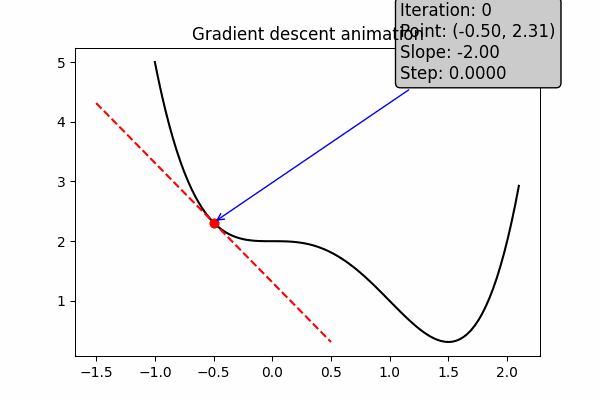

MovieWriter imagemagic unavailable; using Pillow instead.


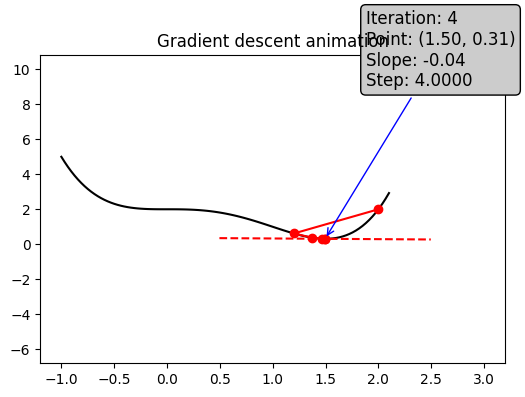

In [16]:
history, result = gd_optim(2, gradient_func2, 0.1, 100)
gd_anim(history, func2, gradient_func2, (-1,2.1), name = 'gd2_init_2_lr0_1.gif')

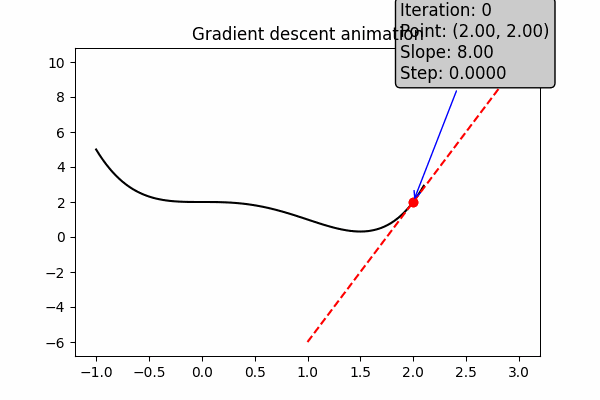

MovieWriter imagemagic unavailable; using Pillow instead.


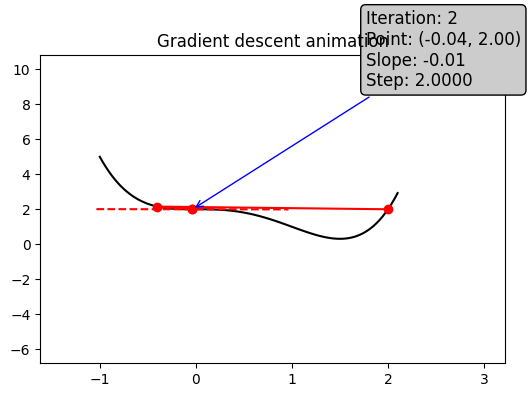

In [11]:
history, result = gd(2, gradient_func2, 0.3, 100)
gd_anim(history, func2, gradient_func2, (-1,2.1), name = 'gd2_init_2_lr0_3.gif')

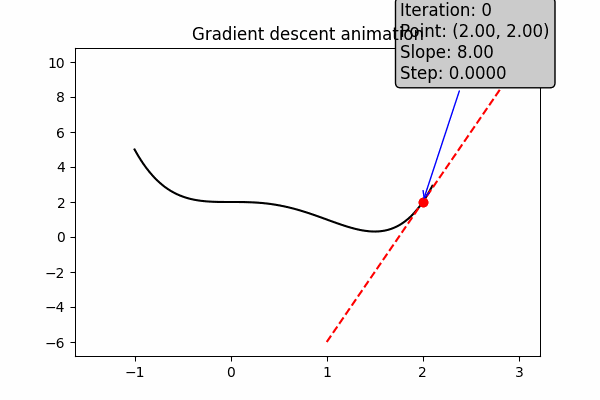

## for d>1
When $l: \mathbb{R}^d \rightarrow \mathbb{R}$,

$$
x^{(t+1)} = x^{(t)} - \alpha \nabla l ( x^{(t)}),
$$
where
$$
\nabla l = \begin{pmatrix}
\frac{\partial l}{x_1}\\
\vdots\\
\frac{\partial l}{x_d}
\end{pmatrix}
= \left ( \frac{\partial l}{\partial \mathbf{x}} \right )^T
$$
for some learning rate $\alpha>0$. 

Note: $\frac{\partial l}{\partial \mathbf{x}}$ is a derivative of $l$ with respect to $\mathbf{x}\in \mathbb{R}^d$. Given $x^{(t)}\in\mathbb{R}^p$, $\frac{\partial l}{\partial \mathbf{x}} (x^{(t)})$ can be considered as a linear map $\mathbb{R}^d \rightarrow \mathbb{R}$ such that
$$ x^* \mapsto \frac{\partial l}{\partial \mathbf{x}}(x^{(t)}) x^*$$

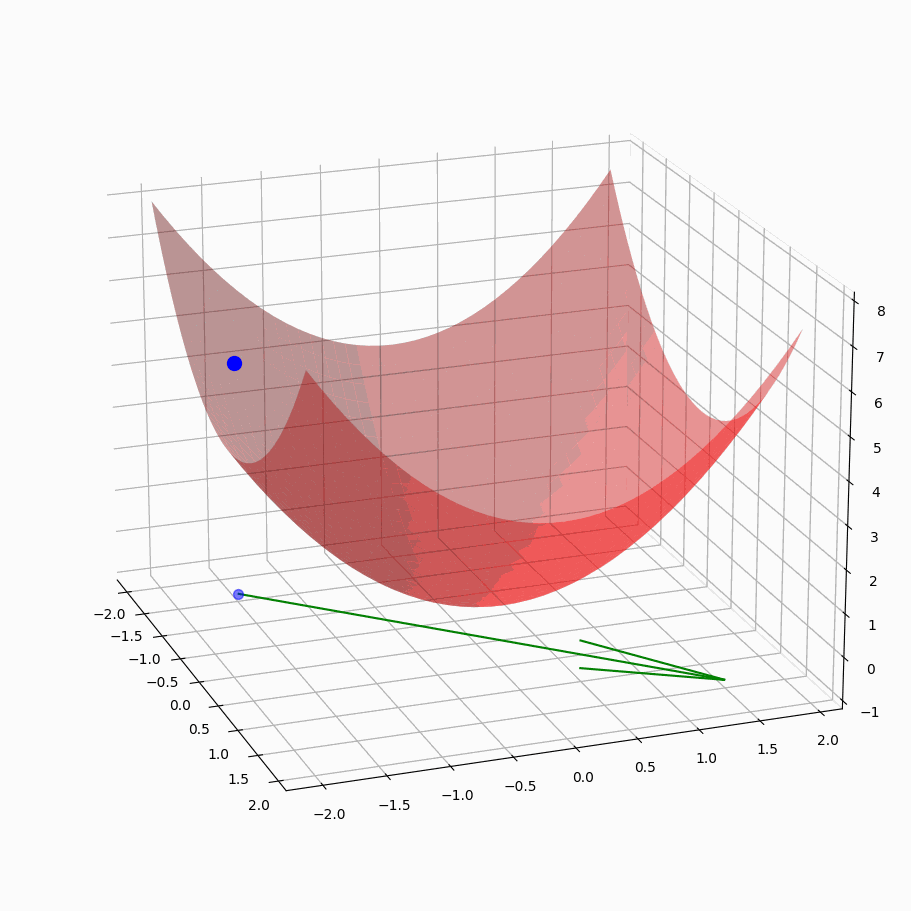

## Linear Regression

Let's compute the gradient of
$$l(\beta; \mathbb{X},\mathbf{y}) =(\mathbf{y}-\mathbb{X}\beta)^T(\mathbf{y}-\mathbb{X}\beta)=\mathbf{y}^T\mathbf{y} - \beta^T\mathbb{X}^T\mathbf{y} - \mathbf{y}^T\mathbb{X}\beta+\beta^T\mathbb{X}^T\mathbb{X}\beta $$

See https://en.wikipedia.org/wiki/Matrix_calculus for computation guide.

$$ 
\frac{\partial l}{\partial \beta} (\beta) = -2\mathbf{y}^T\mathbb{X}+ 2\beta^T \mathbb{X}^T\mathbb{X} = [2\mathbb{X}^T(\mathbb{X}\beta - \mathbf{y})]^T
$$

We can actually have **analytic solution** to $\beta$ if $\mathbb{X}^T\mathbb{X}$ has a full rank because 

1. $\frac{\partial^2 l}{\partial \beta^2} (\beta)=\mathbb{X}^T\mathbb{X}$ is a positive definite matrix.
2. The solution to $\frac{\partial l}{\partial \beta} (\beta)=0$ gives the unique minimizer. 

$\frac{\partial l}{\partial \beta} (\beta)=0$ means
\begin{align*}
\beta^T \mathbb{X}^T\mathbb{X} &= \mathbf{y}^T\mathbb{X} \\
\mathbb{X}^T\mathbb{X}  \beta& = \mathbb{X}^T\mathbf{y}\\
\beta& = (\mathbb{X}^T\mathbb{X}  )^{-1} \mathbb{X}^T\mathbf{y}
\end{align*}

What if $\mathbb{X}^T\mathbb{X}$ is not a full-rank matrix? It's not invertible and we cannot use the formula. Notice that $l(\beta; \mathbb{X},\mathbf{y})$ can be minimized at some point although it is not unique. i.e., the optimization problem has a solution!

Let's see what we get if we use a gradient-descent algorithm. 

In [12]:
def lr_gradient(beta, X,y):
    """
    Gradient function of linear regression model
    
    Input:
        beta: np array (p+1,)
        X: np array (n,p+1)
        y: np array (n,)
    Output:
        (-y.T@X+beta.T@ X.T@X )/n
    """
    n = X.shape[0]
    return (-y.T@X+beta.T@ X.T@X )/n

In [13]:
import pandas as pd

USE ISLP. We will use datasets in an ``R`` library. Here, the ``R`` code is used only for loading the dataset.

In [14]:
from ISLP import load_data
Boston = load_data("Boston")
print(type(Boston),'\n')
Boston

<class 'pandas.core.frame.DataFrame'> 



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [15]:
y = Boston['medv']
X = Boston[['lstat', 'age']]
X

,lstat,age
0,4.98,65.2
1,9.14,78.9
2,4.03,61.1
3,2.94,45.8
4,5.33,54.2
...,...,...
501,9.67,69.1
502,9.08,76.7
503,5.64,91.0
504,6.48,89.3


In [16]:
X = X.to_numpy()
y = y.to_numpy()
print(y.shape)
print(X.shape)
#X = X.reshape(-1,1) # you will need this if you're doing simple linear regression.
#print(X.shape)


(506,)
(506, 2)


Create a design matrix for $X$ to include the intercept

In [17]:
n,p = X.shape # gives you the dimensions of your matrix
ones_vector = np.ones((n,1)) #create a vector of ones 

X = np.hstack((ones_vector,X)) # add it to the front
X

array([[ 1.  ,  4.98, 65.2 ],
       [ 1.  ,  9.14, 78.9 ],
       [ 1.  ,  4.03, 61.1 ],
       ...,
       [ 1.  ,  5.64, 91.  ],
       [ 1.  ,  6.48, 89.3 ],
       [ 1.  ,  7.88, 80.8 ]])

The answer using the anaytic solution is

In [18]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([33.22276053, -1.03206856,  0.03454434])

Let's modify the gradient descent algorithm.

In [19]:
import copy
def lr_gd(start, X,y, lr, max_iter, tol=0.01):
    """
    Gradient Descent optimization
    Input:
        start: np.array(d,) or double
            initial value for the input in the loss function (x or beta in the above representation)
            d: dimension of input in the loss function 
        lr: scalar value
            learinng rate (step size for GD)
        max_iter: integer
            max number of iterations
        tol: scalar
            tolerance to conditionally stop the algorithm (in this case a default value is 0.01)
    Output:
        steps: list, trajectory of optimization
        x: final output
    """
    steps = [start] # history tracking
    beta = copy.deepcopy(start)
    n = X.shape[1]
    for _ in range(max_iter):
        grad = lr_gradient(beta, X,y) # linear regression gradient
        if np.abs(grad).sum()<tol:
          break    
        beta = beta - lr*grad
        steps.append(beta) # history tracing

    return steps, beta

In [20]:
init = np.array([0,0.1,0.]) # p+1 dimension
init.shape[0]

3

In [21]:
history, out = lr_gd(init, X, y, 0.0002, 1000)

In [22]:
out

array([ 0.92018782, -0.72426927,  0.38240763])

You can try different learning rate & number of iterations. You will see that these numbers affect the result significantly. 

## Class
Now, let's practice **Python class**. The codes below are just for practicting Python (not for actual usage). 

In [23]:
class LR_GD:
    def __init__(self,learning_rate=0.0001,n_iters=10000):
        '''
         The class constructor.
         params:
         learning_rate= the learning rate 
         n_iters=number of iterations on gradient descent
        '''
        # initialize learning rate lr and number of iteration iters
        self.lr = learning_rate
        self.iters = n_iters
        
        # initialize the parameters
        self.beta = None
        self.betas = []

    def fit_GD(self,X,y):
        '''
        Used to calculate the beta matrix of the linear regression model.
        :param X: array, features
        :param y: array, known labels
        :return: None
        '''
        n,p = X.shape # gives you the dimensions of your matrix
        ones_vector = np.ones((n,1)) #create a vector of ones 

        X = np.hstack((ones_vector,X)) # add it to the front

        # initialize the beta matrix
        self.beta = np.zeros(X.shape[1])

        # update beta using gradient descent
        for i in range(self.iters):
            grad = (-y.T@X+self.beta.T@ X.T@X )/n
            if np.abs(grad).sum()<0.01:
                break   
            self.beta = self.beta - self.lr*grad
            self.betas.append(self.beta) # history tracing
    
    def fit_anal(self,X,y):
        '''
        computing beta using analytic solution
        :param X: array, features
        :param y: array, known labels
        :return: None
        '''
        n,p = X.shape # gives you the dimensions of your matrix
        ones_vector = np.ones((n,1)) #create a vector of ones 

        X = np.hstack((ones_vector,X)) # add it to the front
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self,X):
        '''
        Makes predictions

        :param X: array, features
        :return: array, predictions
        '''
        # modify the features X by adding one column with value equal to 1
        ones = np.ones(len(X))
        features = np.c_[ones,X]
        # predict the labels matrix
        y_predicted = features @ self.beta
        return y_predicted

### Load the data again and fit the lienar regression using GD

In [24]:
y = Boston['medv'].to_numpy()
X = Boston[['lstat', 'age']].to_numpy()

In [25]:
lr_model = LR_GD() #call an LR_GD instance

In [26]:
lr_model.fit_GD(X,y)

In [27]:
yhat = lr_model.predict(X)
np.mean((yhat - y)**2) # training MSE

155.2911814024954

In [28]:
lr_model.betas[-10:] # the last 10 beta

[array([ 4.36234372, -0.758302  ,  0.34556269]),
 array([ 4.36275056, -0.75830586,  0.34555831]),
 array([ 4.36315739, -0.75830972,  0.34555392]),
 array([ 4.36356422, -0.75831358,  0.34554954]),
 array([ 4.36397104, -0.75831744,  0.34554515]),
 array([ 4.36437786, -0.7583213 ,  0.34554077]),
 array([ 4.36478467, -0.75832516,  0.34553638]),
 array([ 4.36519147, -0.75832901,  0.345532  ]),
 array([ 4.36559827, -0.75833287,  0.34552762]),
 array([ 4.36600506, -0.75833673,  0.34552323])]

### different leraning rate & number of iterations

In [29]:
lr_model_2 = LR_GD(0.0002, 500000)
lr_model_2.fit_GD(X,y)

In [30]:
yhat2 = lr_model_2.predict(X)
np.mean((yhat2 - y)**2) # training MSE

37.882358702521486

In [31]:
lr_model_2.betas[-10:] # the last 10 beta

[array([33.15321422, -1.03140886,  0.03529381]),
 array([33.15321618, -1.03140887,  0.03529379]),
 array([33.15321814, -1.03140889,  0.03529377]),
 array([33.15322011, -1.03140891,  0.03529375]),
 array([33.15322207, -1.03140893,  0.03529373]),
 array([33.15322403, -1.03140895,  0.03529371]),
 array([33.15322599, -1.03140897,  0.03529369]),
 array([33.15322795, -1.03140899,  0.03529367]),
 array([33.15322991, -1.031409  ,  0.03529365]),
 array([33.15323187, -1.03140902,  0.03529362])]

In [32]:
print(len(lr_model_2.betas)) # how many number of iterations?

218818


### Analytic Solution

In [33]:
lr_model.fit_anal(X,y)
yhat = lr_model.predict(X)
np.mean((yhat - y)**2) # training MSE

37.88167709241267